# Looking for Exoplanets: Radial Velocity Method

## Table of Contents:
* **0.** Import Dependancies  
* **1.** Helper Functions  
* **2.** Explanation of the RV Method  
  * **2.1.** Stars that "Wobble"  
  * **2.2.** The Doppler Effect  
  * **2.3.** Derivation of Formulae  
    * **2.3.1.** Assumptions  
    * **2.3.2.** Stellar Parameters  
    * **2.3.3.** Properties of an Exoplanet  
* **3.** Implementation  
  * **3.1.** Necessary Data  
  * **3.2.** Determining Relevant Parameters  
  * **3.3.** Results  
  * **3.4.** Comparison to Literature  

## 0 Import Dependancies

In [1]:
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np
import ipywidgets as widgets

## 1 Helper Functions

In [2]:
def phase(input_array, period, epoch):
    '''

    Converts array from [time, data] to [phase, data].
    
    Parameters
    ----------
    input_array: Array of two columns, time and data
    period: period used in time units
    epoch: start of phase, in time units

    Returns
    -------
    output_array: Array of [phase, data]

    '''

    # Variables
    time = input_array[0]
    data = input_array[1]
    P = period
    t0 = epoch

    # Phase
    phase = time.copy()
    for index, t in enumerate(time):
        phi = (t - t0) / P
        if phi > 0:
            phi -= np.floor(phi)
        elif phi < 0:
            phi -= np.ceil(phi)
        
        phase[index] = phi
        
    # Combine phase with data
    output_array = np.column_stack((phase, data)).T

    return output_array

## 2 Explanation of the RV Method

The **radial velocity** (RV) of an object with respect to an observer is the rate of change of the distance between the object and the observer. In other words, the RV of an object with respect to an observer is the component of the objects velocity along the observers line of sight. Since we are of course observing from the Earth (or telescopes orbiting), this means that the RV is the speed with which the object moves towards (negative RV) or away (positive RV) from the Earth.

Stellar objects in atleast a Two-Body System will orbit their Centre of Mass (COM), also called the *barycenter*. For a system consisting of a Star and an orbiting Exoplanet, the Star will orbit the COM of both itself and the Exoplanet. This (sometimes) causes the star to have some RV with respect to the Earth. We can study the *wavelength* $\lambda$ of the incident light from the star, particularly how it changes. By using the *Doppler Effect*, we can find this RV from $\lambda$.

## 2.1 Stars that "Wobble"

As a star orbits the COM of the system, they appear to "wobble" as seen from the Earth. By noticing these wobbles, we can infer that some other object - such as an exoplanet - is responsible. An exaggerated animation of this wobbling is given on NASAs SpacePlace website regarding Barycenters:

> *Spaceplace.nasa.gov. 2022. What Is a Barycenter? | NASA Space Place – NASA Science for Kids. [online] Available at: <https://spaceplace.nasa.gov/barycenter/en/#:~:text=It%20is%20the%20center%20of,the%20surface%20of%20the%20sun.> [Accessed April 2022].*

For example, the COM of the Sun and the Earth lies inside the Sun, about $449 km$ from the centre. In contrast, the Barycenter of the Sun and Jupiter lies just outside the Suns surface, $792000 km$ from the centre! To calculate how much of an effect each has on the RV of the Sun, we use *conservation of momentum*. Let us discuss two orbiting objects, of mass $m_1$ and $m_2$, each with their respective velocities of $v_1$ and $v_2$:

$$ m_1 v_1 + m_2 v_2 = 0 $$

We can take the absolute magnitude of the velocities to get:

$$ m_1 \left| v_1 \right| = m_2 \left| v_2 \right| $$

We will be using this equation later to determine the mass of an exoplanet $m_{pl}$. Although, how do we find the RV of a star $v_{*}$?

## 2.2 The Doppler Effect

The *Doppler Effect* is the change in frequency / wavelength of a wave in relation to an observer who is moving relative to the wave source. For example, as a car moves past an observer standing on a street, the pitch of the sound heard from the car changes when the car approaches and recedes from the observer. This is due to the fact that as the source moves towards the observer, each successive wave is emitted closer to the observer than the one previous. As such, each wave takes slightly less time to reach the observer and so the frequency is increased / wavelength is decreased. The opposite is true for waves travelling away from the observer.

Since the light incident on our telescopes from other stars are waves, we may observe this phenomenon. As a star moves away from us, the wavelength of light $\lambda$ **increases** to $\lambda_r$, being *redshifted*. Conversley, as a star moves towards us, the wavelength of light $\lambda$ **decreases** to $\lambda_b$, being *blueshifted*. A diagram displaying this is as follows:

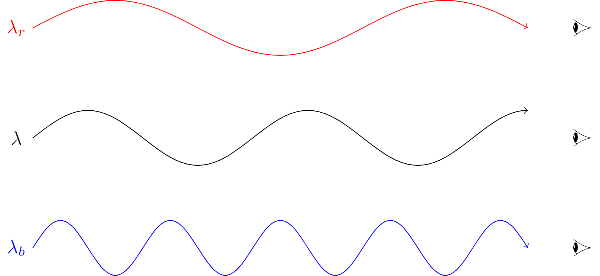

Although the derivation will not be done here, a formula describing the Doppler Shift is as follows:

$$ \frac{\Delta \lambda}{\lambda} = \frac{v_r}{c} $$

where:  
 > $v_r$ is the radial velocity of the object  
   $c$ is the speed of light in vacuum  
   $\lambda$ is the wavelength of the object if it were not shifted (average over series)  
   $\Delta \lambda$ is the change in wavelength of the object  
   
We can find the change in wavelength by studying the absorption lines from the spectrum of light from the star. When the light is either blueshifted or redshifted, the absorption lines will shift to accomodate this. A diagram detailing this is as follows, with no units on either axes - we are simply observing the spectrum (with the dips being the absorption lines):

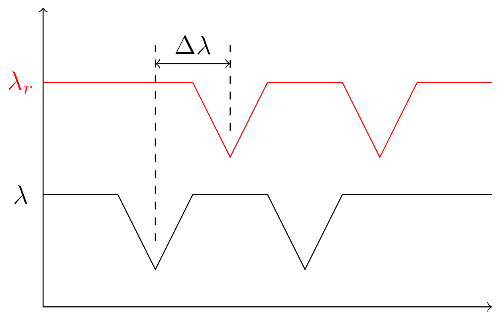

## 2.3 Derivation of Formulae

We now have the foundations required to construct the equations that we will use throughout the implementation. There is more still to be introduced, but these will be mentioned as they appear.

What would we like to calculate?

* The semi-major axis of Orbit $a$
* The Mass of the Exoplanet $m_{pl}$ and thus the density $\rho$
* The Equilibrium Temperature of the Exoplanet $T_{eq}$
* The type of exoplanet, as inferred from the above and more

Now what parameters do we need?

* The Mass of the Star $M_{*}$
* The Effective Temperature of the Star $T_{eff}$
* The Radius of the Star $R_{*}$
* The Maximum Relative Radial Velocity of the star $v_{*}$
* The Orbital Period of the Star (and thus exoplanet) $P$
* The Radius of the Exoplanet $R_{pl}$

The methods to find these will all be shown / discussed.

### 2.3.1 Assumptions

We first make some assumptions that allow us to use the equations that follow. These are:

* The orbit of the exoplanet is circular
* The star has only one exoplanet
* The orbital plane is parallel to our line of sight, there is no inclination

These assumptions do limit us for this project, but are not always far from reality. We can still account for all these, however this will complicate the equations and as such are outside the scope of this project.

*Note: We also assume the Transit Method has been conducted on this star and exoplanet, to allow for more detailed analysis of the exoplanet.*

### 2.3.2 Stellar Parameters

We measure the Mass of a Star $M_{*}$ by first finding its Luminosity $L$. In a similar fashion as done in the 3rd Problem Set of PY3109, this allows us to plot the star on the H-R diagram. By using Stellar Evolution Models - a set of differential equations - we can estimate $M_{*}$ by treating it as a free variable. Note also that in doing so we can also estimate $T_{eff}$. Assuming the star is a Blackbody, we can use the following equation to measure the Radius of the Star, $R_{*}$:

$$ L = 4\pi \sigma T_{eff}^4 R_{*}^2 $$

We can measure $v_{*}$ by plotting data obtained for the relative radial velocity measurements. Using the formula from the doppler effect above - and by performing the spectral analysis required on the star, we can find the radial velocity of the star over time. We can then use a periodogram to find the period $P$, or if this is already known from transit methods, we can finally plot the relative radial velocities vs orbital phase. The following is an example of such a graph for Kepler-10:

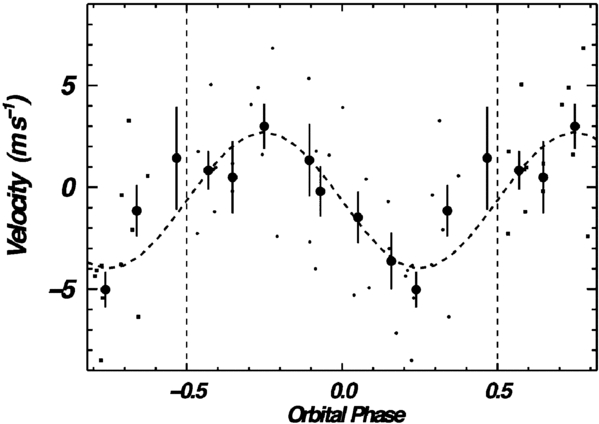

**Source:** *Batalha, N. et al., 2011. <i>KEPLER</i>'S FIRST ROCKY PLANET: KEPLER-10b. The Astrophysical Journal, 729(1), p.27.*

Notice a sinusoidal fit applied to the data. We can infer $v_{*}$ from this graph by finding the maximum amplitude, in this case $v_{*} \approx 2.5 ms^{-1} $.

### 2.3.3 Properties of an Exoplanet

We can find the semi-major axis of the exoplanets orbit, $a$, by Keplers Third Law:

$$ a^3 = \frac{G M_{*} P^2}{4 \pi^2} $$

Since we assumed a circular orbit, we can find the velocity of the planet in its orbit, explained by the following picture:

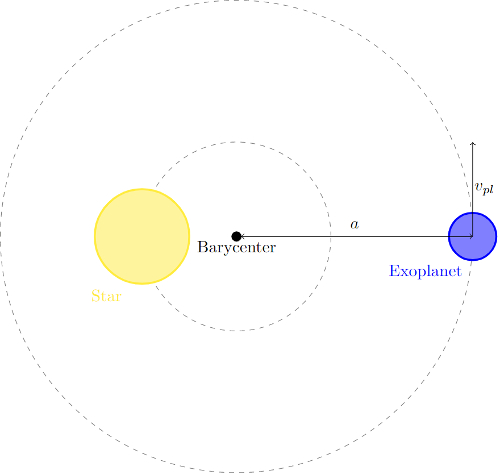

*Note: Greatly exaggerated*

The velocity $v_{pl}$ is given by:

$$ v_{pl} = \frac{2 \pi a}{P} $$

We can now use the formula found earlier from the conservation of momentum to calculate $m_{pl}$:

$$ m_{pl} = \frac{M_{*} v_{*}}{v_{pl}} $$

Now that we have the mass of the planet, we can calculate the density $\rho$ - assuming we have the radius $R_{pl}$ from another method such as the transit method. Let us assume a roughly spherical exoplanet:

$$ \rho = \frac{m_{pl}}{\frac{4}{3} \pi R_{pl}^3} $$

Finally, we can calculate the equilibrium temperature $T_{eq}$ of the exoplanet. We can do this following a similar procedure in PY2106 Lecture 17, wherein we let $P_{rad} = P_{abs}$. However, we also take into account the Bond Albedo $A_B$ and the Heat Redistribution Factor $F$ (greenhouse effect):

$$ T_{eq} = T_{eff} \left( \frac{1 - A_B}{4F} \right)^{\frac{1}{4}} \left( \frac{R_{*}}{2a} \right)^{\frac{1}{2}} $$

Since $A_B$ and $F$ are not known precisely, we will follow the procedure as in (*Southworth, 2010*) - approximating $1 - A_B = 4F$:

$$ T_{eq} = T_{eff} \left( \frac{R_{*}}{2a} \right)^{\frac{1}{2}} $$

**Source:**
> *John Southworth, Homogeneous studies of transiting extrasolar planets – III. Additional planets and stellar models, Monthly Notices of the Royal Astronomical Society, Volume 408, Issue 3, November 2010, Pages 1689–1713, https://doi.org/10.1111/j.1365-2966.2010.17231.x*

**With all of the above information, we can classify the Exoplanet.**

## 3 Implementation

We will now implement the above in Python. We first discuss the necessary information taken from listed sources, followed by determining the rest of the necessary data. Following this we have discussion of the Calculations, Results and classification of the exoplanet in question. Finally, we will have comparison to literature.

The Star and Exoplanet being discussed are **WASP-48** and **WASP-48b**

## 3.1 Necessary Data

From NASAs Exoplanet Archive, we find that WASP-48 has a Mass of $M_{*} = 1.17 M_{\odot}$, an Effective Temperature of $T_{eff} = 6332.8267K$ and Radius $R_{*} = 1.77061 R_{\odot}$.

**Source:**
> *NASAs Exoplanet Archive: https://exoplanetarchive.ipac.caltech.edu/overview/WASP-48%20b#planet_WASP-48-b_collapsible*

We can find the Radial Velocity data as a table from the following:

**Source:**
> *Enoch, B. et al., 2011. WASP-35b, WASP-48b, AND HAT-P-30b/WASP-51b: TWO NEW PLANETS AND AN INDEPENDENT DISCOVERY OF A HAT PLANET. The Astronomical Journal, 142(3), p.86.*

This table has been converted to a csv file and can be loaded as follows:

In [3]:
WASP48_data = np.genfromtxt("assets\\WASP48_RV_SOPHIE.csv", delimiter = ',', skip_header = 1, skip_footer = 0).T
WASP48_data

array([[5305.6441, 5323.5842, 5328.5784, 5409.489 , 5427.5503, 5429.4215,
        5431.4254, 5432.3967, 5476.2714, 5477.2679, 5482.2945, 5484.2801,
        5485.288 , 5488.2831],
       [ -19.711 ,  -19.648 ,  -19.831 ,  -19.667 ,  -19.747 ,  -19.809 ,
         -19.831 ,  -19.589 ,  -19.745 ,  -19.591 ,  -19.594 ,  -19.529 ,
         -19.823 ,  -19.569 ]])

We can then convert the second column - the Radial Velocity in $kms^{-1}$ - to Relative Radial Velocity in $ms^{-1}$. We do this by taking the magnitude of this dataset, and remove the average of this dataset - assuming this is the COM velocity. We can then simply convert to $ms^{-1}$, as follows:

In [4]:
WASP48_data[1] = np.abs(WASP48_data[1])
WASP48_data[1] -= np.average(WASP48_data[1])
WASP48_data[1] *= 1000
WASP48_data[1]

array([  19.28571429,  -43.71428571,  139.28571429,  -24.71428571,
         55.28571429,  117.28571429,  139.28571429, -102.71428571,
         53.28571429, -100.71428571,  -97.71428571, -162.71428571,
        131.28571429, -122.71428571])

We now have a dataset of Time $(BJD - 2400000)$ and Relative Radial Velocity $(ms^{-1})$.

From an analysis by Transit Method of the same Star and exoplanet, we have that $P = 2.1436 days$ and $R_{pl} = 1.644 R_{Jup}$.

## 3.2 Determining Relevant Parameters

We now must determine the Maximum Radial Velocity due to the Exoplanet, $v_{*}$. We can do this by using the *phase* helper function developed at the start. This function allows us to phase fold the **WASP-48** Relative Radial Velocity data:

In [5]:
WASP48_phased = phase(WASP48_data, 2.1436, 5305.6441)
WASP48_phased

array([[ 0.00000000e+00,  3.69145363e-01,  6.98964359e-01,
         4.44159358e-01,  8.69845120e-01,  7.42769173e-01,
         6.77598433e-01,  1.30714686e-01,  5.98479194e-01,
         6.33513715e-02,  4.08285128e-01,  3.34577347e-01,
         8.04767681e-01,  2.01996641e-01],
       [ 1.92857143e+01, -4.37142857e+01,  1.39285714e+02,
        -2.47142857e+01,  5.52857143e+01,  1.17285714e+02,
         1.39285714e+02, -1.02714286e+02,  5.32857143e+01,
        -1.00714286e+02, -9.77142857e+01, -1.62714286e+02,
         1.31285714e+02, -1.22714286e+02]])

We can now plot this new phase folded dataset. We must apply a sinusoidal fit to the data, we will manually find this by adjusting the amplitude $A$ and phase-shift $\varphi$:

$$ y_{fit} = A sin\left( \frac{2\pi}{P} x + \varphi \right) $$

With $y_{fit}$ being the fitted y-data, and $x$ the input data over a range $\left[ 0, P \right]$. We will use *ipywidgets* to do this:

In [6]:
def plot_phased_fitted(amplitude, period, phase):
    # fitted sine wave
    x = np.linspace(0, period, 100)
    y = amplitude * np.sin(2 * np.pi * x / period + phase)
    
    # phase x-axis
    phasex = np.linspace(0, 1, 100)
    
    # Plotting
    fig, ax = plt.subplots(figsize = (12,6))
    plt.scatter(WASP48_phased[0], WASP48_phased[1], color = 'k', label = 'Data')
    plt.plot(phasex, y, color = 'k', linestyle = '--', label = 'Fitted Plot')

    ax.set_ylim(-175, 175)
    plt.xlabel("Orbital Phase")
    plt.ylabel("Radial Velocity (m/s)")
    plt.legend()
    plt.margins(x = 0, y = 0, tight = True)
    plt.show()

# create interactive slider
widgets.interact(plot_phased_fitted, 
                 amplitude = widgets.FloatSlider(value = 137.5, min = 120, max = 160, step = 0.1, description = 'amplitude:', readout_format = '.1f'),
                 period = widgets.FloatSlider(value = 2.1436, min = 2.14, max = 2.15, step = 0.0001, description = 'period:', readout_format = '.4f'),
                 phase = widgets.FloatSlider(value = 3.2, min = 0, max = 2 * np.pi, step = 0.01, description = 'phase:', readout_format = '.2f'))

interactive(children=(FloatSlider(value=137.5, description='amplitude:', max=160.0, min=120.0, readout_format=…

<function __main__.plot_phased_fitted(amplitude, period, phase)>

And so, we have determined that $v_{*} = 137.5 ms^{-1}$ at a $\varphi = 3.2$ radians.

## 3.3 Results

Following the equations as defined above, we arrive at the following:

| **Parameter** |   **Value**  |   **Units**  |
|:-------------:|:------------:|:------------:|
|     $$a$$     | $$0.034538$$ |    $$AU$$    |
|   $$v_{pl}$$  | $$175.2838$$ | $$kms^{-1}$$ |
|   $$m_{pl}$$  | $$0.972855$$ |  $$M_{Jup}$$ |
|    $$\rho$$   | $$277.0126$$ | $$kgm^{-3}$$ |
|   $$T_{eq}$$  | $$2093.854$$ |     $$K$$    |

From the above, we can arrive at the conclusion that the Exoplanet **WASP-48b** is a *Hot-Jupiter* Gas Giant. We say this as:

* A short Period in range $\left[ 1.3, 111 \right]$ Earth Days
* A Mass in range $\left[ 0.36, 11.8 \right]$ Jupiter Masses
* An unusually low density for Gas Giants
* High Equilibrium Temperature

## 3.4 Comparison to Literature

Comparing to Literatire from NASAs Exoplanet Archive:

| **Parameter** |  **Value**  |   **Units**  |
|:-------------:|:-----------:|:------------:|
|     $$a$$     | $$0.03449$$ |    $$AU$$    |
|   $$m_{pl}$$  |  $$0.984$$  |  $$M_{Jup}$$ |
|    $$\rho$$   |   $$275$$   | $$kgm^{-3}$$ |
|   $$T_{eq}$$  |  $$2035$$   |     $$K$$    |

**Source:**
> *NASAs Exoplanet Archive: https://exoplanetarchive.ipac.caltech.edu/overview/WASP-48%20b#planet_WASP-48-b_collapsible*

As we can see, the data calculated is similar to literature.